In [1]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
samples = np.loadtxt("kmeansSamples.txt")

In [2]:
### 估计bandwidth
bandwidth = cluster.estimate_bandwidth(samples, quantile=0.2)
print(bandwidth)

4.528776571054436


[[ 6.278276   13.65518989]
 [ 2.48936265  0.43984307]
 [-2.54974089  3.54244933]
 [12.56729723  5.50656992]
 [-2.92514764 11.0884457 ]]


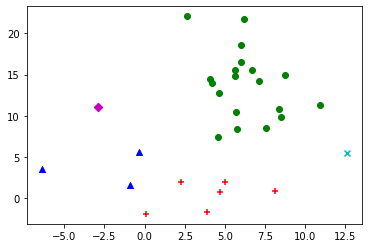

In [3]:
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(samples)
print(ms.cluster_centers_)
markers = [ 'o', '+', '^', 'x', 'D', '*', 'p' ]
colors  = [ 'g', 'r', 'b', 'c', 'm', 'y', 'k' ]
linestyle = [ '-', '--', '-.', ':' ]
if len(np.unique(ms.labels_)) <= len(markers):
    for i in range(len(samples)):
        plt.scatter(samples[i, 0], samples[i, 1], marker=markers[ms.labels_[i]], c=colors[ms.labels_[i]])
    plt.show()

### 用Mean Shift算法进行图像分割

In [4]:
import matplotlib.image as mpimg
from time import time

path = r"原版书.jpg"
img = mpimg.imread(path)

print(type(img), img.shape, img[0,0]) # 图片加载后的数据类型、形状和（0，0）像素点的三原色值

<class 'numpy.ndarray'> (934, 734, 3) [43 36 26]


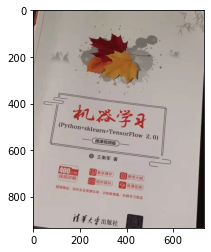

In [5]:
plt.imshow(img)

In [6]:
# 将二维的图像数组改为一维的，以适合聚类算法的要求
height = img.shape[0] 
width = img.shape[1]
img1 = img.reshape((height*width, 3))

In [7]:
#t0 = time() # 开始计时
#bandwidth = cluster.estimate_bandwidth(img1, quantile=0.4)
#print(time() - t0)

In [8]:
t0 = time() # 开始计时
ms = cluster.MeanShift(bandwidth=25, bin_seeding=True).fit(img1)
print("time", time() - t0)
# 构建一幅新的相同大小的空图片
pic_new = np.zeros((height, width, 3), dtype='i')
# 将分簇后一维标签改为二维的，与图片的形状一致
label = ms.labels_.reshape((height, width))
print(ms.cluster_centers_) # 看一下簇中心的RGB三通道值

time 38.678085803985596
[[189.47612188 179.73489904 176.5341613 ]
 [159.16646716  98.51743676  38.72212912]
 [ 19.99000406  13.89776514  11.2242178 ]
 [ 87.88985109  15.029887    18.6358644 ]
 [150.89538613  51.60313348  47.67554898]
 [ 45.02707779  35.51087807  36.19893567]]


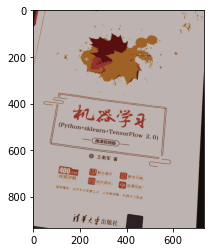

In [9]:
# 将簇中心三通道值改为整形的，便于显示
center = ms.cluster_centers_
center = center.astype(np.int)

# 同簇点的颜色用该簇簇中心点的颜色代替
for i in range(height):
    for j in range(width):
        pic_new[i,j] = center[label[i,j]]

plt.imshow(pic_new)

In [10]:
n_labels = len(np.unique(ms.labels_))
for i in range(n_labels): # 看一下每个簇的样本数量
    print(len(np.where(ms.labels_ == i)[0]))

597484
38970
11838
10524
15880
10860


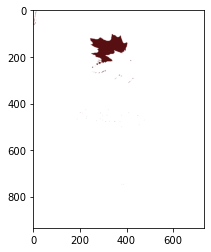

In [11]:
# 单独显示簇k，其他簇都用白色代替
k = 3
center1 = center.copy()
for i in range(k):
    center1[i] = np.array([255, 255, 255])
for i in range(k+1, n_labels):
    center1[i] = np.array([255, 255, 255])

for i in range(height):
    for j in range(width):
        pic_new[i,j] = center1[label[i,j]]
plt.imshow(pic_new)

### 用kmeans算法进行图像分割

In [12]:
# 将图像的颜色聚类成k种，即分割成k个区域
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k).fit(img1)

# 构建一幅新的相同大小的空图片
pic_new = np.zeros((height, width, 3), dtype='i')
# 将分簇后一维标签改为二维的，与图片的形状一致
label = kmeans.labels_.reshape((height, width))
print(kmeans.cluster_centers_) # 看一下簇中心的RGB三通道值

[[184.88138279 174.96015574 170.52134053]
 [ 53.94874673  23.72119342  23.25517521]
 [140.47246404  98.28872631  81.93176205]]


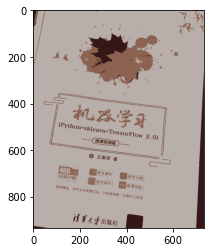

In [13]:
# 将簇中心三通道值改为整形的，便于显示
center = kmeans.cluster_centers_
center = center.astype(np.int)

# 同簇点的颜色用该簇簇中心点的颜色代替
for i in range(height):
    for j in range(width):
        pic_new[i,j] = center[label[i,j]]

plt.imshow(pic_new)